# Lab 4: exploratory data analysis and visualization

How to navigate the lab:

- For some exercises, you will need to fill in the blanks by adding the correct sentences or code. Look for ## YOUR CODE HERE.
- In certain sections, you are required to explain why the code behaves in specific ways. Identify these with a ❓💬❓ mark.
- In some parts, you will need to write a piece of code entirely on your own. Look for "💻💻YOUR CODE HERE:"

## Part 1: Analiysing a data set

#### Upload and prepare your dataset. 

1. Upload the dataset that I provided to your Kaggle environment. You can find information about this dataset [here](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset/data).

> Please use the file I provided, as I have made special modifications to it.

2. Remove duplicates and null values from the dataset. 
    - Drop all rows that contain at least one null value.
    - Drop duplicates but keep the last. 

In [2]:
%pip install pandas
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

#df = pd.read_csv('/kaggle/input/shopping-behaviour-modified-for-lab/shopping_behaviour_new(1).csv')
df = pd.read_csv('https://raw.githubusercontent.com/DaliaO15/python-course-imgs/refs/heads/main/shopping_behaviour_new(1).csv')
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14.0,Venmo,Fortnightly
1,2,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2.0,Cash,Fortnightly
2,3,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly


In [4]:
df.shape

(3997, 18)

## Drop rows with any null values and delete duplicates

In [5]:
df = df.dropna(how='any', axis=0)
df.shape

(2610, 18)

In [6]:
#df.duplicated(subset=['Customer ID'], keep='last')
df = df.drop_duplicates(subset=['Customer ID'], keep='last')
df.shape

(2545, 18)

#### Questions:

❓💬❓ Q1: What is the age distribution of the customers? How old are the people who shop the most?  
❓💬❓ Q2: Who spends the most money on purchases, categorised by gender?  
❓💬❓ Q3: What is the most common frequency at which men make purchases? How does it compare for women?  
❓💬❓ Q4: Which seasons experience the highest sales volume?  
❓💬❓ Q5: In which cities do the customers tend to spend the most in average?  
❓💬❓ Q6: Which locations have the most consistent purchasing behavior?  
❓💬❓ Q7: How many of the customers who are subscribed wrote a review?  
❓💬❓ Q8: What is the average review rating of customers who are not subscribed?  
❓💬❓ Q9: How effective, in percentage, are promo codes in increasing the purchase amount?  

In [7]:
print('❓💬❓ Q1: What is the age distribution of the customers? How old are the people who shop the most?')
print('\n!💬! a) The distribution of customer ages:')
print(df.describe()['Age'][1:])

print('\n!💬! b) The age distribution of customers with the top 10% purchase amount:')
amt_percentile_90 = df['Purchase Amount (USD)'].quantile(0.90)
print(df[df['Purchase Amount (USD)'] >= amt_percentile_90].describe()['Age'][1:])

❓💬❓ Q1: What is the age distribution of the customers? How old are the people who shop the most?

!💬! a) The distribution of customer ages:
mean    44.060118
std     15.225375
min     18.000000
25%     31.000000
50%     44.000000
75%     57.000000
max     70.000000
Name: Age, dtype: float64

!💬! b) The age distribution of customers with the top 10% purchase amount:
mean    43.723077
std     15.407222
min     18.000000
25%     30.000000
50%     45.000000
75%     56.000000
max     70.000000
Name: Age, dtype: float64


In [8]:
print('❓💬❓ Q2: Who spends the most money on purchases, categorised by gender?')
print('\n!💬! The average spend amount grouped by gender:')
print('** Females spend slightly more than men, statistically insignificant **')
df[['Gender','Purchase Amount (USD)']].groupby(['Gender']).mean().transpose()

❓💬❓ Q2: Who spends the most money on purchases, categorised by gender?

!💬! The average spend amount grouped by gender:
** Females spend slightly more than men, statistically insignificant **


Gender,Female,Male
Purchase Amount (USD),60.014303,59.42966


In [9]:
print('❓💬❓ Q3: What is the most common frequency at which men make purchases? How does it compare for women?')
print('\n!💬! The time between purchases grouped by gender:')
print('** Most men buys quarterly, most women annually, as described by the following table **')
pd.DataFrame(df.groupby(['Gender','Frequency of Purchases']).size(), columns=['Count'])

❓💬❓ Q3: What is the most common frequency at which men make purchases? How does it compare for women?

!💬! The time between purchases grouped by gender:
** Most men buys quarterly, most women annually, as described by the following table **


Count
Gender Frequency of Purchases       
Female Annually                  141
       Bi-Weekly                 121
       Every 3 Months            129
       Fortnightly               105
       Monthly                   116
       Quarterly                 113
       Weekly                    114
Male   Annually                  239
       Bi-Weekly                 238
       Every 3 Months            245
       Fortnightly               247
       Monthly                   246
       Quarterly                 259
       Weekly                    232

In [10]:
print('❓💬❓ Q4: Which seasons experience the highest sales volume?')
print('\n!💬! The total spend amount grouped by season:')
print('** Fall has the highest sales volume, closely followed by spring **')

df[['Season', 'Purchase Amount (USD)']].groupby(['Season']).sum()

❓💬❓ Q4: Which seasons experience the highest sales volume?

!💬! The total spend amount grouped by season:
** Fall has the highest sales volume, closely followed by spring **


,Purchase Amount (USD)
Season,
Fall,39490.0
Spring,39376.0
Summer,37105.0
Winter,35768.0


In [11]:
print('❓💬❓ Q5: In which cities do the customers tend to spend the most in average?')

print('\n!💬! The top 10 average spend grouped by state:')
print('** Top spend in Arizona **')
df[['Location', 'Purchase Amount (USD)']].groupby(['Location']).mean().sort_values(by=['Purchase Amount (USD)'], ascending=False).head(10)

❓💬❓ Q5: In which cities do the customers tend to spend the most in average?

!💬! The top 10 average spend grouped by state:
** Top spend in Arizona **


,Purchase Amount (USD)
Location,
Arizona,68.400000
Alaska,67.529412
Michigan,66.607843
Pennsylvania,65.083333
Tennessee,64.183673
North Dakota,63.180000
New Mexico,62.705882
Illinois,62.500000
West Virginia,62.367347


In [12]:
print('❓💬❓ Q6: Which locations have the most consistent purchasing behavior?')

print('\n!💬! The minimum standard deviation in spend grouped by state:')
print('** Most consistent spend in Maine **')
df[['Location', 'Purchase Amount (USD)']].groupby(['Location']).std().sort_values(by=['Purchase Amount (USD)'], ascending=True).head(10)

❓💬❓ Q6: Which locations have the most consistent purchasing behavior?

!💬! The minimum standard deviation in spend grouped by state:
** Most consistent spend in Maine **


,Purchase Amount (USD)
Location,
Maine,19.977467
New Hampshire,20.206657
New Jersey,21.374745
New Mexico,21.855246
South Carolina,22.079285
New York,22.219882
Texas,22.330201
Oregon,22.335007
Massachusetts,22.617213


In [13]:
print('❓💬❓ Q7: How many of the customers who are subscribed wrote a review?')

# Missing reviews were dropped during cleansing, relaoad the data
df2 = pd.read_csv('https://raw.githubusercontent.com/DaliaO15/python-course-imgs/refs/heads/main/shopping_behaviour_new(1).csv')
df2 = df2.drop_duplicates(subset=['Customer ID'], keep='last')
print('\n!💬! The number of review givers grouped by subscription status:')
print('** 1005 subscribers wrote a review **')

pd.DataFrame(df2[df2['Review Rating'].notnull()][['Subscription Status', 'Review Rating']].groupby(['Subscription Status']).size(), columns=['Count'])


❓💬❓ Q7: How many of the customers who are subscribed wrote a review?

!💬! The number of review givers grouped by subscription status:
** 1005 subscribers wrote a review **


,Count
Subscription Status,
No,2705
Yes,1005


In [14]:
print('❓💬❓ Q8: What is the average review rating of customers who are not subscribed?')
print('\n!💬! Average review rating grouped by subscription status:')
print('** Non-subscribers gave 3.75 on average **')
df[['Subscription Status', 'Review Rating']].groupby(['Subscription Status']).mean()


❓💬❓ Q8: What is the average review rating of customers who are not subscribed?

!💬! Average review rating grouped by subscription status:
** Non-subscribers gave 3.75 on average **


,Review Rating
Subscription Status,
No,3.752157
Yes,3.736903


In [15]:
print('❓💬❓ Q9: How effective, in percentage, are promo codes in increasing the purchase amount?')

print('\n!💬! Average purchase amount grouped by promo code:')
promo_avg_amts = df[['Purchase Amount (USD)', 'Promo Code Used']].groupby(['Promo Code Used']).mean().transpose()
print(promo_avg_amts)
eff_pct = 100 * (promo_avg_amts.iloc[0]['Yes']/promo_avg_amts.iloc[0]['No'] - 1)
print('** Promotion code efficiency:', eff_pct.round(2), '% **')

❓💬❓ Q9: How effective, in percentage, are promo codes in increasing the purchase amount?

!💬! Average purchase amount grouped by promo code:
Promo Code Used               No       Yes
Purchase Amount (USD)  59.391154  59.92714
** Promotion code efficiency: 0.9 % **


## Part 2: Creating visualsations

In this part, you need to generate one plot to show the following:
- Purchase amount distribution by location 
- Frequency of purchases by gender 
- Review frequency by subscription status. 

Consider using subplots, hues, personalized colors, line shapes, and other design elements to enhance the visualization. Be creative, and ensure that your design is visually accessible.

Submit your plot along with a 100-200 word explanation of your layout and design choices.

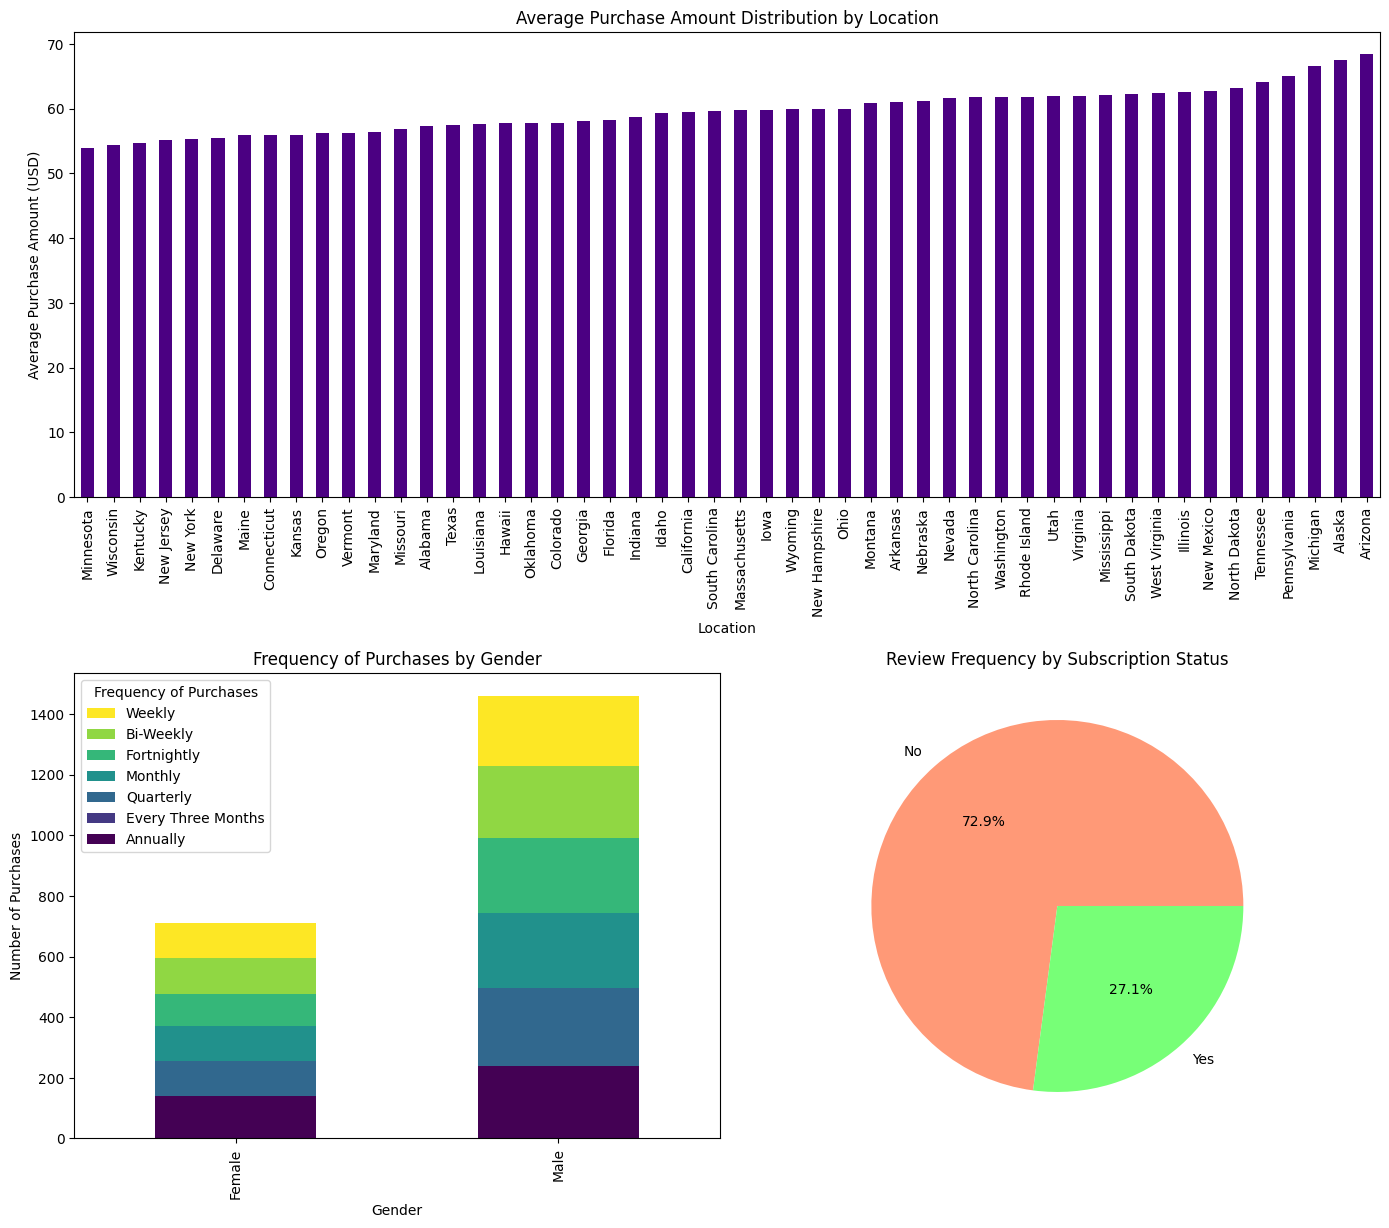

In [20]:

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(14, 18))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])

# Purchase amount distribution by location (spans both columns)
ax1 = fig.add_subplot(gs[0, :])
df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values().plot(kind='bar', ax=ax1, color='indigo')
ax1.set_title('Average Purchase Amount Distribution by Location')
ax1.set_xlabel('Location')
ax1.set_ylabel('Average Purchase Amount (USD)')
ax1.tick_params(axis='x', rotation=90)

# Frequency of purchases by gender (left column)
ax2 = fig.add_subplot(gs[1, 0])
order = ['Annually', 'Every Three Months', 'Quarterly', 'Monthly', 'Fortnightly', 'Bi-Weekly', 'Weekly']
df['Frequency of Purchases'] = pd.Categorical(df['Frequency of Purchases'], categories=order, ordered=True)
df.groupby(['Gender', 'Frequency of Purchases'], observed=False).size().unstack().reindex(columns=order).plot(kind='bar', stacked=True, ax=ax2, colormap='viridis')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[::-1], labels[::-1], title='Frequency of Purchases')
ax2.set_title('Frequency of Purchases by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Number of Purchases')

# Review frequency by subscription status (right column)
ax3 = fig.add_subplot(gs[1, 1])
df2[df2['Review Rating'].notnull()].groupby('Subscription Status').size().plot(kind='pie', autopct='%1.1f%%', ax=ax3, colors=['#ff9977', '#77ff77'])
ax3.set_title('Review Frequency by Subscription Status')
ax3.set_ylabel('')

# Increase padding between charts
plt.subplots_adjust(hspace=0.4)

plt.tight_layout()
plt.show()

### Layout and design choices
The layout is based on a 2✕2 grid with each row having equal height to produce a balanced distribution of plots.
- **plot 1 (top row)**: The plot spans two columns, making it easier to fit all buckets in the x-axis. A barchart is chosen for its simplicity of comparing discrete values
- **plot 2 (bottom left)**: Displays a stacked bar chart using colors of different lightness to make it interpretable also in gray scale. The bars represent discrete categories and the stacked values shows the cumulative distribution of purchase patterns
- **plot 3 (bottom right)**: A pie chart is suitable for displaying proportional data. In this case, where the categories represents 'yes' and 'no', colors with red and green hue helps the intuitive interpretation. The colors are slightly washed out to make sure they contrast with the black text labels.

A common, sans serif, font is used for all plots for clarity and readability. This font is the default provided by the ```matplotlib``` library.
